# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
lat = []
long =[]
max_temp =[]
humidity =[]
clouds =[]
wind =[]
cntry = []
date =[] 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
print('Begin Data Retreival')
print('----------------------------')
for index , city in enumerate(cities, start=1):
    try:
        query_url = url + "appid=" + weather_api_key + '&units='+ units + "&q=" + city
        response = requests.get(query_url)
        print(f"Processing Weather Data {index} | {city}")
        city_name.append(response.json()['name'])
        lat.append(response.json()['coord']['lat'])
        long.append(response.json()['coord']['lon'])
        max_temp.append(response.json()['main']['temp_max'])
        humidity.append(response.json()['main']['humidity'])
        clouds.append(response.json()['clouds']['all'])
        wind.append(response.json()['wind']['speed'])
        cntry.append(response.json()['sys']['country'])
        date.append(response.json()['dt'])
        
    except:
        print('City Not Found. Skipping to next city')
print('----------------------------')
print('End of Data Retrieval')
   
     
    

Begin Data Retreival
----------------------------
Processing Weather Data 1 | egvekinot
Processing Weather Data 2 | inzhavino
Processing Weather Data 3 | bluff
Processing Weather Data 4 | sao filipe
Processing Weather Data 5 | westport
Processing Weather Data 6 | ushuaia
Processing Weather Data 7 | aykhal
Processing Weather Data 8 | punta arenas
Processing Weather Data 9 | norman wells
Processing Weather Data 10 | takoradi
Processing Weather Data 11 | karaul
City Not Found. Skipping to next city
Processing Weather Data 12 | georgetown
Processing Weather Data 13 | lebu
Processing Weather Data 14 | albany
Processing Weather Data 15 | sorvag
City Not Found. Skipping to next city
Processing Weather Data 16 | busselton
Processing Weather Data 17 | vaini
Processing Weather Data 18 | cap malheureux
Processing Weather Data 19 | pitimbu
Processing Weather Data 20 | narsaq
Processing Weather Data 21 | mago
Processing Weather Data 22 | palmer
Processing Weather Data 23 | hobart
Processing Weather

Processing Weather Data 195 | mount isa
Processing Weather Data 196 | ixtapa
Processing Weather Data 197 | san cristobal
Processing Weather Data 198 | guangyuan
Processing Weather Data 199 | puyang
Processing Weather Data 200 | matam
Processing Weather Data 201 | guerrero negro
Processing Weather Data 202 | stokmarknes
Processing Weather Data 203 | geraldton
Processing Weather Data 204 | abu dhabi
Processing Weather Data 205 | puerto escondido
Processing Weather Data 206 | xining
Processing Weather Data 207 | kiunga
Processing Weather Data 208 | cururupu
Processing Weather Data 209 | chuy
Processing Weather Data 210 | warrnambool
Processing Weather Data 211 | ribeira grande
Processing Weather Data 212 | bud
Processing Weather Data 213 | williston
Processing Weather Data 214 | azad shahr
Processing Weather Data 215 | mayumba
Processing Weather Data 216 | agadez
Processing Weather Data 217 | soyo
Processing Weather Data 218 | tolaga bay
Processing Weather Data 219 | anloga
Processing Wea

Processing Weather Data 390 | general pico
Processing Weather Data 391 | damghan
Processing Weather Data 392 | gorno-chuyskiy
City Not Found. Skipping to next city
Processing Weather Data 393 | antalaha
Processing Weather Data 394 | khonuu
City Not Found. Skipping to next city
Processing Weather Data 395 | verkhnyaya inta
Processing Weather Data 396 | chokurdakh
Processing Weather Data 397 | port hedland
Processing Weather Data 398 | uwayl
City Not Found. Skipping to next city
Processing Weather Data 399 | faya
Processing Weather Data 400 | ust-maya
Processing Weather Data 401 | asfi
Processing Weather Data 402 | vsevolodo-vilva
City Not Found. Skipping to next city
Processing Weather Data 403 | los llanos de aridane
Processing Weather Data 404 | kismayo
Processing Weather Data 405 | cartagena
Processing Weather Data 406 | vangaindrano
Processing Weather Data 407 | wiwili
Processing Weather Data 408 | jumla
Processing Weather Data 409 | preobrazheniye
Processing Weather Data 410 | qaqo

Processing Weather Data 582 | srednekolymsk
Processing Weather Data 583 | sur
Processing Weather Data 584 | kamariotissa
Processing Weather Data 585 | sept-iles
Processing Weather Data 586 | ambulu
Processing Weather Data 587 | kigoma
Processing Weather Data 588 | goulburn
Processing Weather Data 589 | bolungarvik
City Not Found. Skipping to next city
Processing Weather Data 590 | slave lake
Processing Weather Data 591 | sucua
Processing Weather Data 592 | borogontsy
Processing Weather Data 593 | saint anthony
Processing Weather Data 594 | khalkhal
Processing Weather Data 595 | chilliwack
Processing Weather Data 596 | malwan
City Not Found. Skipping to next city
Processing Weather Data 597 | brae
Processing Weather Data 598 | obodivka
Processing Weather Data 599 | glasgow
Processing Weather Data 600 | san andres
Processing Weather Data 601 | ngukurr
City Not Found. Skipping to next city
Processing Weather Data 602 | lahan
Processing Weather Data 603 | manta
Processing Weather Data 604 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({'City Name': city_name,
     'Lat':lat,
     'Lon': long,
     'Max Temperature': max_temp,
     'Humidity': humidity,
     'Cloudiness':clouds,
     'Wind Speed':wind,
     'Country':cntry,
     'Date':date})
df.set_index('City Name', inplace = True)
display(df)

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,
Egvekinot,66.3167,-179.1667,-12.04,82,100,4.67,RU,1618360937
Inzhavino,52.3185,42.4937,8.23,67,84,3.62,RU,1618360938
Bluff,-46.6000,168.3333,12.22,88,100,3.13,NZ,1618360938
São Filipe,14.8961,-24.4956,24.59,61,0,3.73,CV,1618360939
Westport,41.1415,-73.3579,10.00,66,1,3.60,US,1618360718
...,...,...,...,...,...,...,...,...
Manta,-0.9500,-80.7333,28.00,74,40,2.06,EC,1618361069
College,64.8569,-147.8028,9.00,39,75,2.06,US,1618361197
Marsh Harbour,26.5412,-77.0636,23.62,71,0,9.45,BS,1618361197


In [5]:
df.to_csv(path_or_buf = output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humid_af = df[df['Humidity']> 100 ]
humid_af

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,


In [7]:
#  Get the indices of cities that have humidity over 100%.
display(humid_af)


,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,


In [24]:
clean_city_data = df[df['Humidity']<= 100] 

In [31]:
display(clean_city_data)
display(clean_city_data.describe())

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,
Egvekinot,66.3167,-179.1667,-12.04,82,100,4.67,RU,1618360937
Inzhavino,52.3185,42.4937,8.23,67,84,3.62,RU,1618360938
Bluff,-46.6000,168.3333,12.22,88,100,3.13,NZ,1618360938
São Filipe,14.8961,-24.4956,24.59,61,0,3.73,CV,1618360939
Westport,41.1415,-73.3579,10.00,66,1,3.60,US,1618360718
...,...,...,...,...,...,...,...,...
Manta,-0.9500,-80.7333,28.00,74,40,2.06,EC,1618361069
College,64.8569,-147.8028,9.00,39,75,2.06,US,1618361197
Marsh Harbour,26.5412,-77.0636,23.62,71,0,9.45,BS,1618361197


,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,18.758994,14.413540,15.626942,70.163669,53.246403,3.398237,1.618361e+09
std,32.936312,89.741958,11.724885,22.142133,40.124698,2.571805,9.828644e+01
min,-54.800000,-179.166700,-23.370000,6.000000,0.000000,0.060000,1.618360e+09
25%,-6.716325,-65.851300,8.000000,58.000000,9.000000,1.540000,1.618361e+09
50%,20.749000,15.974900,18.000000,75.000000,58.000000,2.680000,1.618361e+09
75%,46.479125,86.970625,25.722500,88.000000,97.000000,4.600000,1.618361e+09
max,78.218600,179.316700,35.000000,100.000000,100.000000,15.430000,1.618361e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

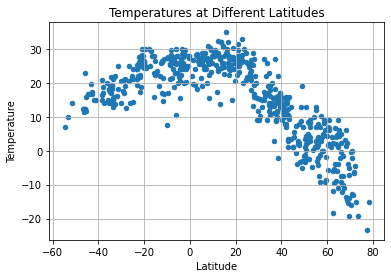

In [36]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Max Temperature', grid = True)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperatures at Different Latitudes');

## Latitude vs. Humidity Plot

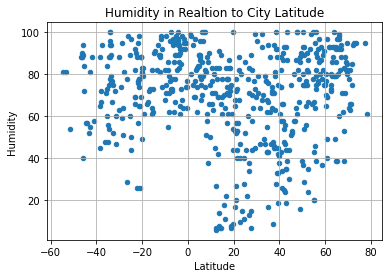

In [11]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Humidity', grid = True)
plt.xlabel('Latitude')
plt.title('Humidity in Realtion to City Latitude');

## Latitude vs. Cloudiness Plot

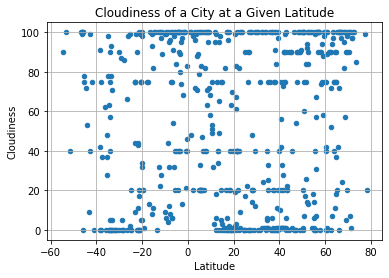

In [12]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Cloudiness', grid = True)
plt.xlabel('Latitude')
plt.title('Cloudiness of a City at a Given Latitude');

## Latitude vs. Wind Speed Plot

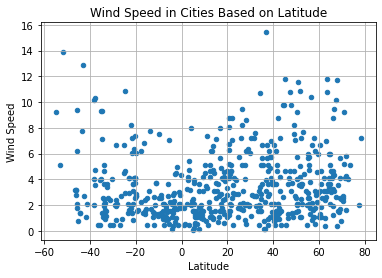

In [72]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Wind Speed', grid = True)
plt.xlabel('Latitude')
plt.title('Wind Speed in Cities Based on Latitude');

## Linear Regression

In [14]:
north = clean_city_data[clean_city_data['Lat']>=0]
south =  clean_city_data[clean_city_data['Lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R_value is: -0.8945998975448086


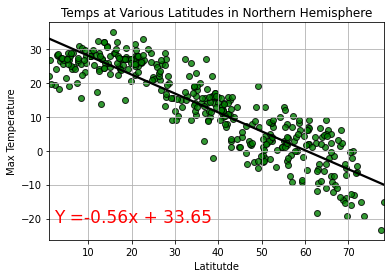

In [88]:
slope, intercept, r_value, p_value, std_err = linregress(x = north['Lat'],y = north['Max Temperature'])

sns.regplot(x=north['Lat'], y = north['Max Temperature'],
            scatter_kws={"color": "green", 'edgecolors': 'black'},line_kws={"color": "black"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(2,-21, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Red')
print(f'The R_value is: {r_value}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R_value is: 0.6565296947873298


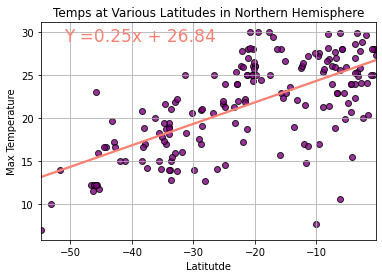

In [90]:
slope, intercept, r_value, p_value, std_err = linregress(x = south['Lat'],y = south['Max Temperature'])

sns.regplot(x=south['Lat'], y = south['Max Temperature'],
            scatter_kws={"color": "purple", 'edgecolors': 'Black'},line_kws={"color":"salmon"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(-51,29, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'salmon')
print(f'The R_value is: {r_value}')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R_value is: 0.16111630959247494


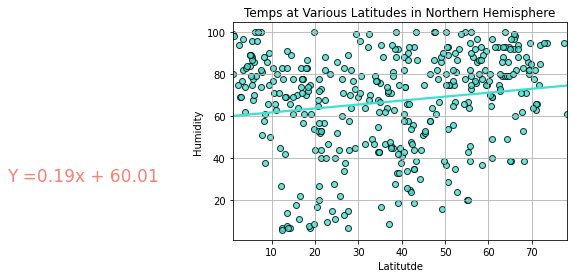

In [98]:
slope, intercept, r_value, p_value, std_err = linregress(x = north['Lat'],y = north['Humidity'])

sns.regplot(x=north['Lat'], y = north['Humidity'],
            scatter_kws={"color": "turquoise", 'edgecolors': 'Black'},line_kws={"color":"turquoise"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(-51,29, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'salmon')
print(f'The R_value is: {r_value}')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression